In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import shap
import joblib

In [ ]:
#importer la dataset
import pandas as pd
data = pd.read_csv("fraudTest.csv")

In [ ]:
#début de dataset
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#fin de dataset
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
#format (ligne, colomns)
data.shape

(555719, 23)

In [ ]:
#vérifications des données (types, valeurs nulles, données dupliquées)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
data.duplicated().any()

False

In [ ]:
#repatitions des données
data['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


In [ ]:
#pourcentage de chaque repartition
fraud_percentage =data['is_fraud'].value_counts(normalize=True) * 100
print("Fraudulent transactions percentage:\n", fraud_percentage)

Fraudulent transactions percentage:
 is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


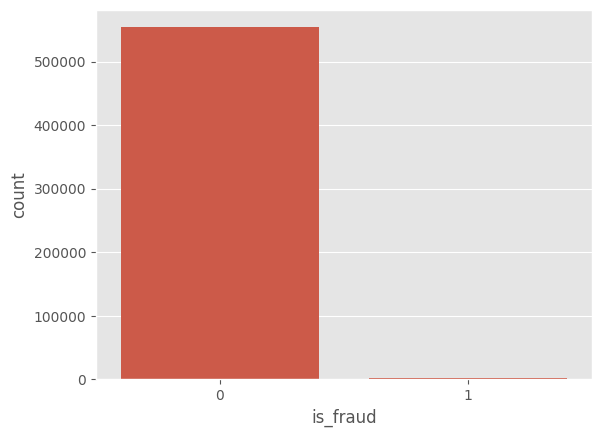

In [ ]:
plt.style.use('ggplot')
sns.countplot(x='is_fraud', data=data)
plt.show()

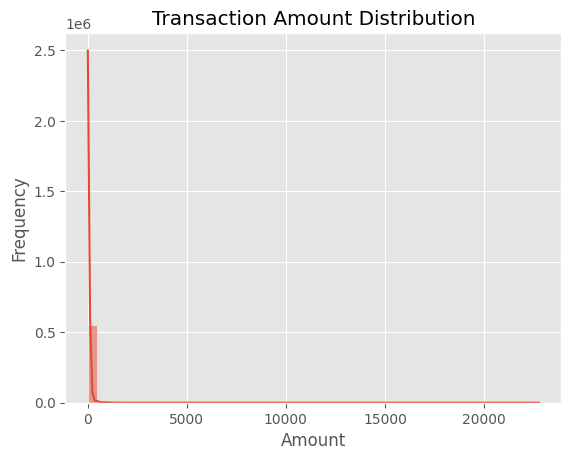

In [ ]:
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

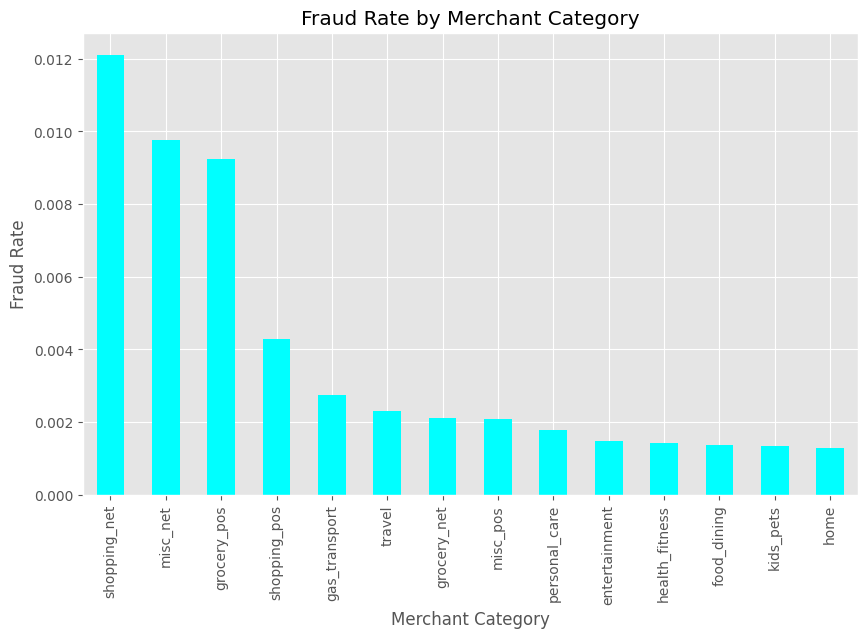

In [ ]:
fraud_rate_by_category = data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_rate_by_category.plot(kind='bar', figsize=(10, 6), color='cyan')
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()

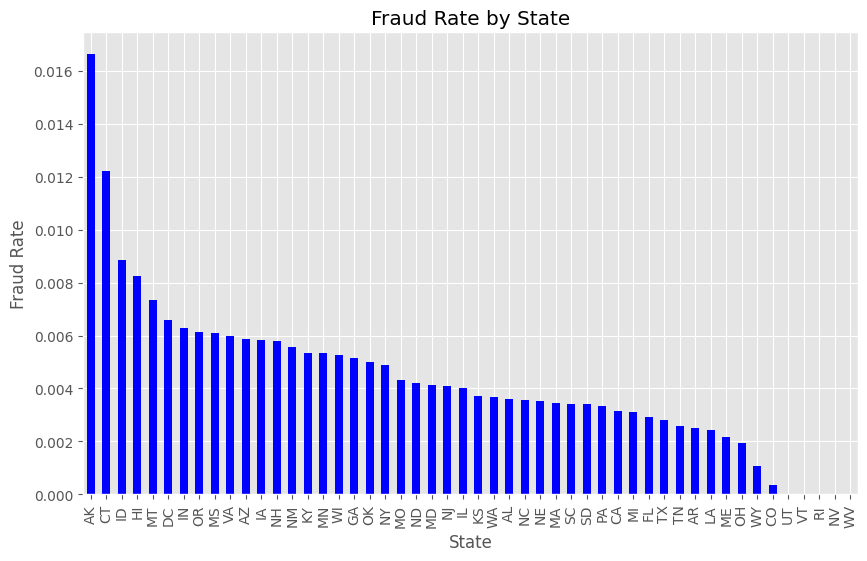

In [ ]:
fraud_rate_by_state = data.groupby('state')['is_fraud'].mean().sort_values(ascending=False)
fraud_rate_by_state.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Fraud Rate by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.show()

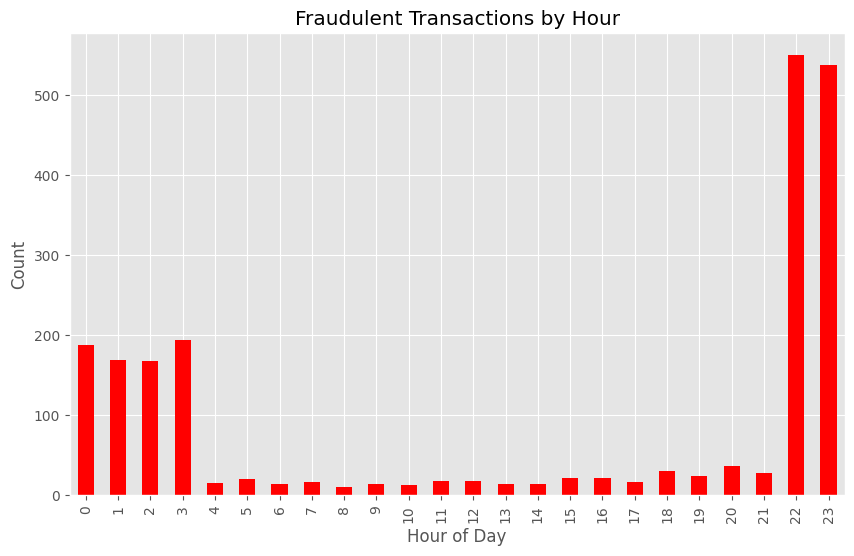

In [ ]:
data['hour'] = pd.to_datetime(data['trans_date_trans_time']).dt.hour
fraud_by_hour = data[data['is_fraud'] == 1].groupby('hour').size()
fraud_by_hour.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
print(data.dtypes)

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
hour                              int32
day_of_week                       int32


In [ ]:
merchant_counts = data['merchant'].value_counts()
data['merchant_freq'] = data['merchant'].map(merchant_counts)
state_counts = data['state'].value_counts()
data['state_freq'] = data['state'].map(state_counts)
data['amt_merchant_freq'] = data['amt'] * data['merchant_freq']
data['amt_state_freq'] = data['amt'] * data['state_freq']
print(data.dtypes)

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
hour                              int32
day_of_week                       int32


In [ ]:
le = LabelEncoder()
data['merchant'] = le.fit_transform(data['merchant'])
data['state'] = le.fit_transform(data['state'])
data['category'] = le.fit_transform(data['category'])
scaler = StandardScaler()
numeric_features = ['amt', 'merchant_freq', 'state_freq', 'amt_merchant_freq', 'amt_state_freq','category']
data[numeric_features] = scaler.fit_transform(data[numeric_features])
print(data.dtypes)


Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                          int64
category                        float64
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                             int64
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
hour                              int32
day_of_week                       int32


In [ ]:
X = data[['amt', 'merchant_freq', 'state_freq', 'amt_merchant_freq', 'amt_state_freq', 'category']]
y = data['is_fraud']

In [ ]:
print(X.dtypes)

amt                  float64
merchant_freq        float64
state_freq           float64
amt_merchant_freq    float64
amt_state_freq       float64
category             float64
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(444575, 6)

In [ ]:
X_test.shape

(111144, 6)


==== Unbalanced Dataset - Logistic Regression ====
Accuracy: 0.9957352623623408
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


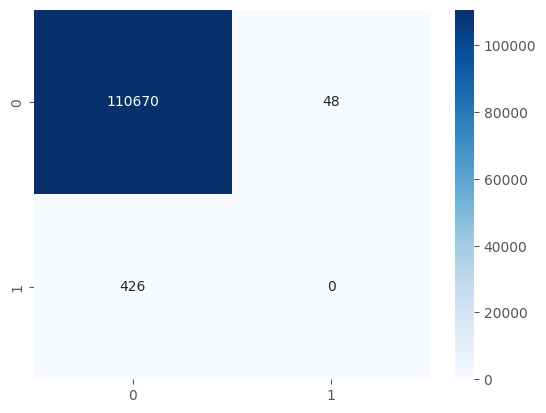

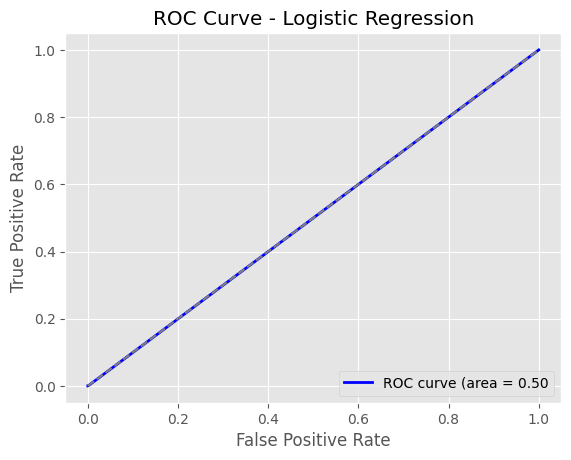


==== Unbalanced Dataset - Decision Tree ====
Accuracy: 0.9964010652846758
Precision: 0.5302325581395348
Recall: 0.5352112676056338
F1 Score: 0.5327102803738317


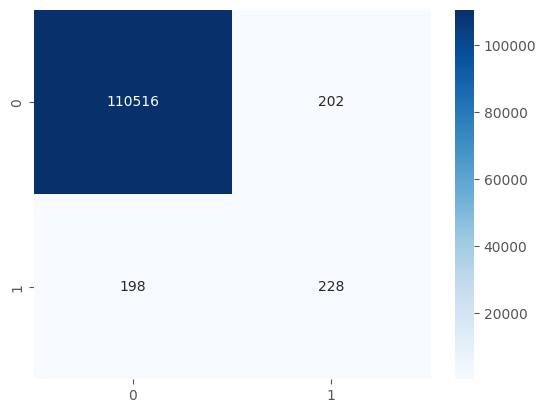

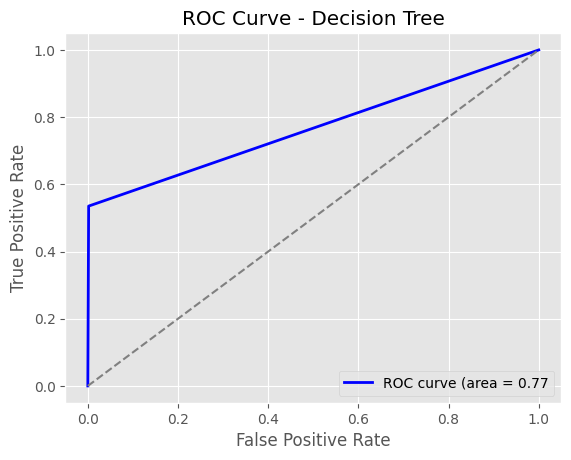


==== Unbalanced Dataset - Random Forest ====
Accuracy: 0.9976786871086158
Precision: 0.78
Recall: 0.5492957746478874
F1 Score: 0.6446280991735537


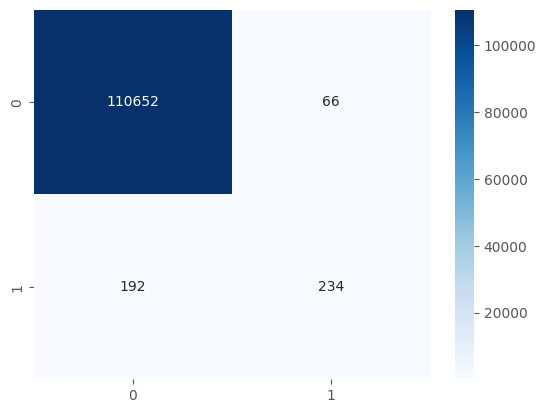

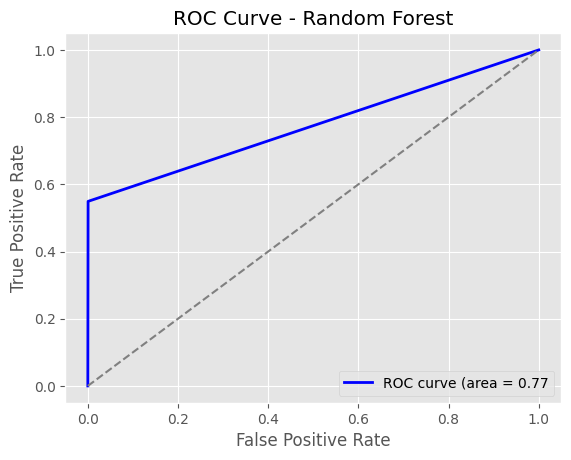

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test, title=""):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    for name, clf in classifiers.items():
        print(f"\n==== {title} - {name} ====")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.show()

        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

train_and_evaluate(X_train, y_train, X_test, y_test, title="Unbalanced Dataset")

In [ ]:
# Étape 2 : Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
X_under.shape

(3438, 6)

In [ ]:
y_under.shape

(3438,)


==== Undersampled Dataset - Logistic Regression ====
Accuracy: 0.9438206290937883
Precision: 0.05177195685670262
Recall: 0.7887323943661971
F1 Score: 0.09716599190283401


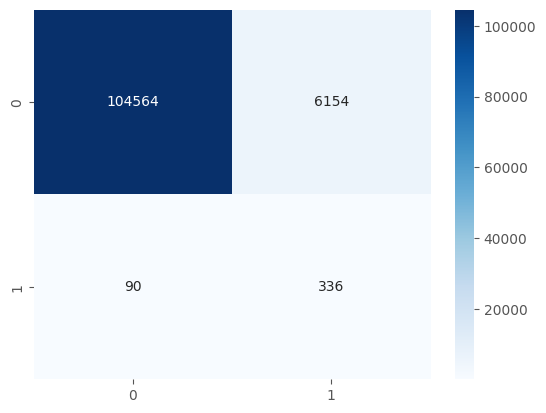

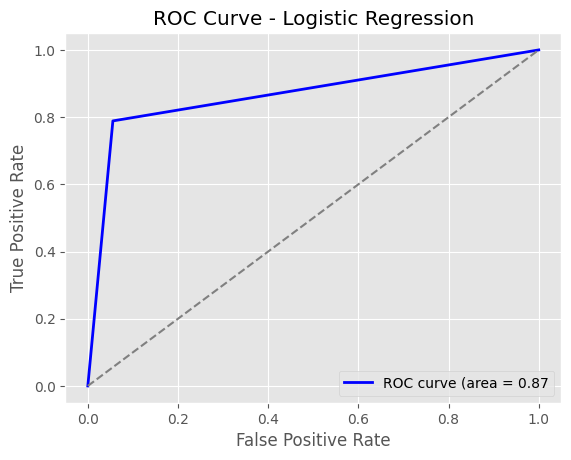


==== Undersampled Dataset - Decision Tree ====
Accuracy: 0.9344274094867919
Precision: 0.053836150845253575
Recall: 0.971830985915493
F1 Score: 0.10202069985214392


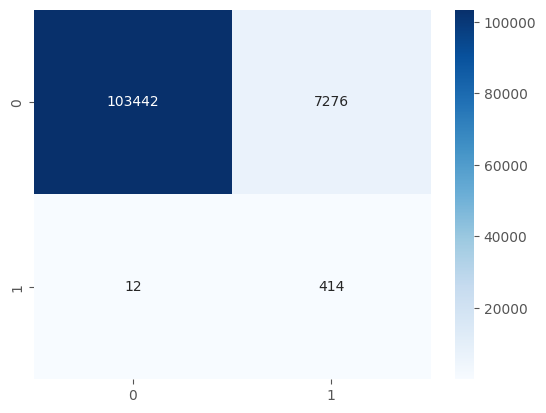

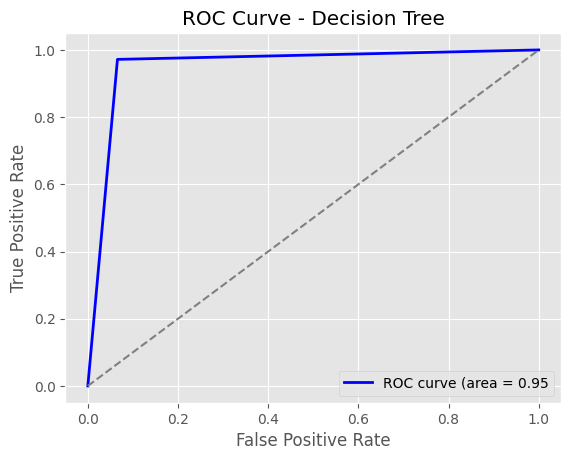


==== Undersampled Dataset - Random Forest ====
Accuracy: 0.9463758727416685
Precision: 0.0652105593966059
Recall: 0.9741784037558685
F1 Score: 0.12223858615611193


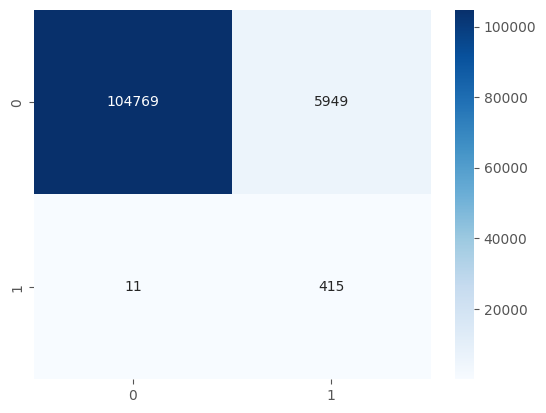

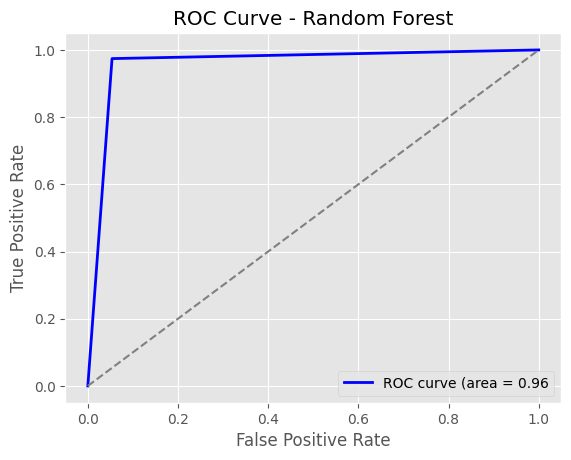

In [ ]:
def train_and_evaluate(X_under, y_under, X_test, y_test, title=""):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    for name, clf in classifiers.items():
        print(f"\n==== {title} - {name} ====")
        clf.fit(X_under, y_under)
        y_pred = clf.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.show()

        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

train_and_evaluate(X_under, y_under, X_test, y_test, title="Undersampled Dataset")

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_smote.shape

(885712, 6)

In [ ]:
print(y_under.value_counts())

is_fraud
0    1719
1    1719
Name: count, dtype: int64


In [ ]:
print(y_smote.value_counts())

is_fraud
0    442856
1    442856
Name: count, dtype: int64



==== Oversampled Dataset - Logistic Regression ====
Accuracy: 0.9497678687108616
Precision: 0.05764282038085435
Recall: 0.7887323943661971
F1 Score: 0.10743405275779376


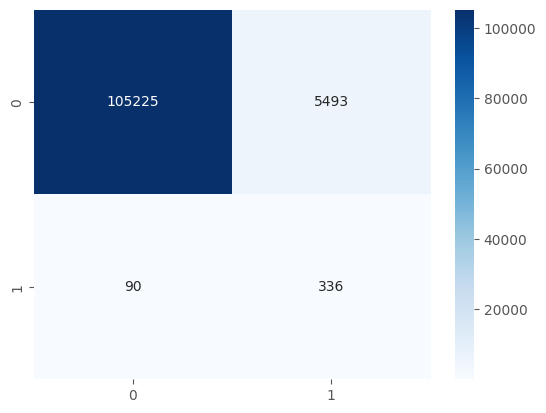

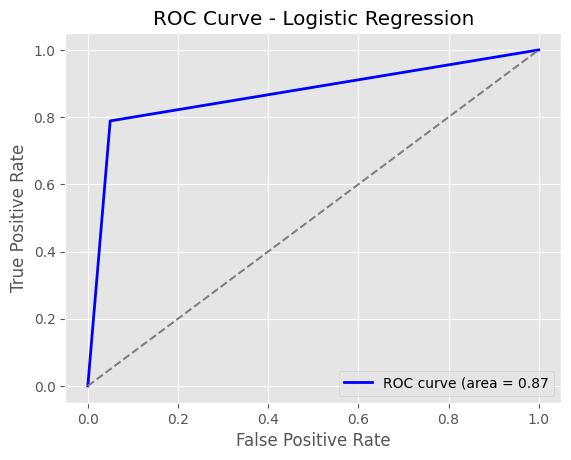


==== Oversampled Dataset - Decision Tree ====
Accuracy: 0.9931710213776722
Precision: 0.3176341730558598
Recall: 0.6807511737089202
F1 Score: 0.43315907393577296


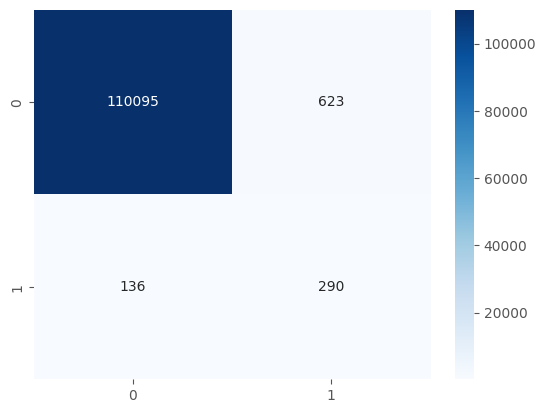

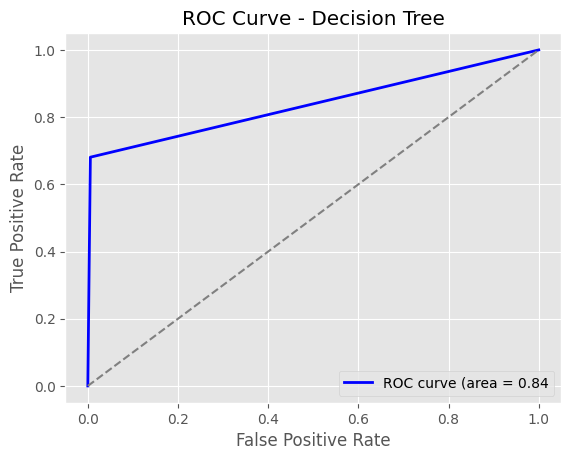


==== Oversampled Dataset - Random Forest ====
Accuracy: 0.9929460879579645
Precision: 0.32064128256513025
Recall: 0.7511737089201878
F1 Score: 0.449438202247191


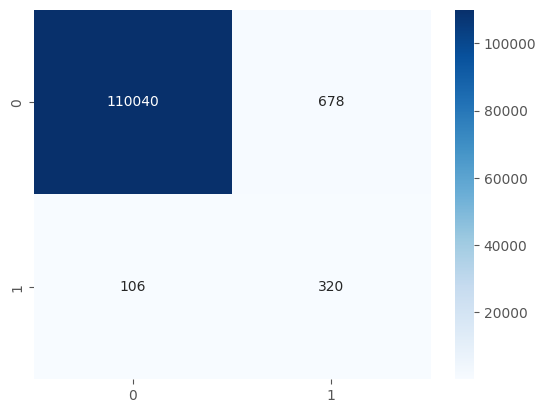

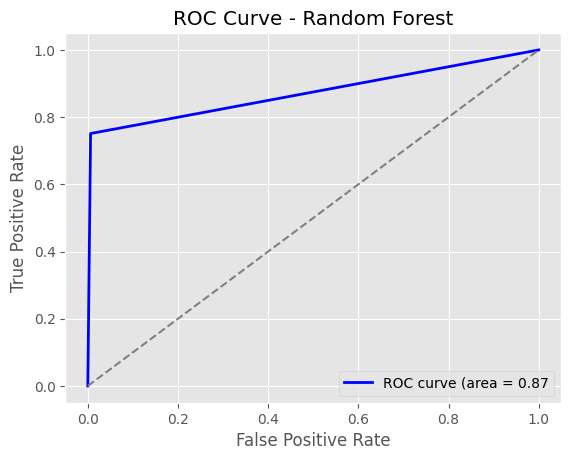

In [ ]:
def train_and_evaluate(X_smote, y_smote, X_test, y_test, title=""):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    for name, clf in classifiers.items():
        print(f"\n==== {title} - {name} ====")
        clf.fit(X_smote, y_smote)
        y_pred = clf.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.show()

        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

train_and_evaluate(X_smote, y_smote, X_test, y_test, title="Oversampled Dataset")

In [ ]:
dtc = RandomForestClassifier()
dtc.fit(X, y)

RandomForestClassifier()

In [ ]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(dtc, 'model.pkl')
print("Modèle sauvegardé avec succès sous 'fmodel.pkl'")

Modèle sauvegardé avec succès sous 'fmodel.pkl'


In [ ]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(dtc, 'fraud_detection_model.pkl')
print("✅ Modèle sauvegardé avec succès sous 'fraud_detection_model.pkl'")

✅ Modèle sauvegardé avec succès sous 'fraud_detection_model.pkl'


In [ ]:
import joblib
model = joblib.load("model.pkl")

In [ ]:
pred=model.predict(X_test)

In [ ]:
import pandas as pd

# Display true and predicted labels side by side
results = pd.DataFrame({
    'True Label': y_test.head().values,
    'Predicted Label': pred[:5]
})

print(results)

   True Label  Predicted Label
0           0                0
1           0                0
2           0                0
3           0                0
4           0                0
